In [6]:
import pandas as pd
import h5py
from pathlib import Path

In [7]:
path = Path('Z:/nahaUsers/casadje/datasets/reservoirs/ResOpsNO/raw')

In [9]:
# Interface to the HDF5 file
store = pd.HDFStore(path / 'reservoir_time_series.h5', 'r')

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [4]:
# List of stations and metadata variables
stations = list(store.get_node('time_series')._v_children)
print('Metadata: ' + ', '.join(list(store.get_node('metadata')._v_children)))

Metadata: correction, lookup_series, quality, variables


In [5]:
# Metadata: variables with units, correction and quality codes
variables = store.get('metadata/variables')
variables

,name,units
volume,Reservoir volume,1e6 m3
stage,Reservoir water level,m


In [6]:
# Metadata: quality codes
store.get('metadata/quality')

0                Unknown
1           Uncontrolled
2      PrimaryControlled
3    SecondaryControlled
Name: quality, dtype: object

In [7]:
# Metadata: correction codes
store.get('metadata/correction')

0                                            No changes
1                             Manual- or ice correction
2                                         Interpolation
3        Value computed with models or/and other series
4     Daily mean computed with arithmetic mean. (Onl...
5        Smooth negative value. (Only used with inflow)
6           Dry pipe. (Only used with groundwater data)
7        Ice in pipe. (Only used with groundwater data)
8       Damaged pipe. (Only used with groundwater data)
9            Pumping. (Only used with groundwater data)
11                    Start/end value linear adjustment
12                               Incomplete data source
13    The value is calculated based on a similar sta...
14    The value is missing; and is only calculated b...
15    The value is the result of a calculation that ...
16                  Value fetched from rejected period.
Name: correction, dtype: object

In [8]:
# Metadata: lookup with availability of each variable/time resolution at each station
lookup = store.get('metadata/lookup_series')
lookup.head()

variable    volume                stage             
resolution instant   hour   day instant   hour   day
station                                             
1.15.0        True  False  True    True  False  True
1.42.0        True  False  True    True  False  True
1.43.0        True  False  True    True  False  True
1.45.0        True  False  True    True  False  True
1.47.0        True  False  True    True  False  True

In [9]:
# Example: read a time series with correction and quality information
ts = store.get(f'time_series/1.15.0/volume/day')
ts.head()

,value,correction,quality
time,,,
1939-07-01 11:00:00+00:00,8.283333,0,3
1939-07-02 11:00:00+00:00,8.750000,0,3
1939-07-03 11:00:00+00:00,9.099999,0,3
1939-07-04 11:00:00+00:00,8.750000,0,3
1939-07-05 11:00:00+00:00,8.166666,0,3


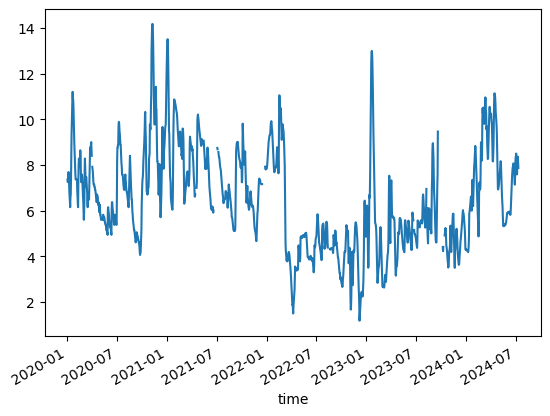

In [10]:
ts.loc['2020':,'value'].plot();

In [11]:
store.close()